<a href="https://colab.research.google.com/github/atharv67/DLMiniProjects/blob/master/Capital_One_DS_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import os
import json

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Capital One DS Challenge Data/DS-master')
os.listdir()

Mounted at /content/drive


['README.md', 'transactions.zip', 'transactions.txt', '.DS_Store']

# **Question 1:Load**

Loading the JSON Data

In [21]:
data=pd.read_json('transactions.txt', orient='records', lines=True, dtype={'accountNumber':object,'customerId':object,'cardLast4Digits': object,'enteredCVV':object, 'cardCVV':object})

In [22]:
data.head(10)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.00,,,,True,,,False,False
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,02,...,,0.00,,,,True,,,False,False
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,02,...,,0.00,,,,True,,,False,False
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,05,...,,0.00,,,,True,,,False,False
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,,US,02,...,,9.37,,,,True,,,False,False
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,05,...,,0.00,,,,True,,,False,False


In [23]:
data.shape

(786363, 29)

Overall Data Structure

In [24]:
rows=data.shape[0]
cols=data.shape[1]
print("# of Rows=", rows, "(Number of Records) \n# of Columns=", cols,"(Number of fields in each record)")

# of Rows= 786363 (Number of Records) 
# of Columns= 29 (Number of fields in each record)


In [25]:
list(data.columns)

['accountNumber',
 'customerId',
 'creditLimit',
 'availableMoney',
 'transactionDateTime',
 'transactionAmount',
 'merchantName',
 'acqCountry',
 'merchantCountryCode',
 'posEntryMode',
 'posConditionCode',
 'merchantCategoryCode',
 'currentExpDate',
 'accountOpenDate',
 'dateOfLastAddressChange',
 'cardCVV',
 'enteredCVV',
 'cardLast4Digits',
 'transactionType',
 'echoBuffer',
 'currentBalance',
 'merchantCity',
 'merchantState',
 'merchantZip',
 'cardPresent',
 'posOnPremises',
 'recurringAuthInd',
 'expirationDateKeyInMatch',
 'isFraud']

In [26]:
#Unique Values Analysis
unique_in_each=[]
unique_count=[]
for i in data:
  unique_list=sorted(list(data[i].unique()))
  unique_in_each.append(unique_list)
  unique_count.append(len(unique_list))

In [27]:
#Null Values Analysis
null_count=[]
for i in data:
  null_count.append(data[i].isna().sum())

In [28]:
#There might be blank string values
blank_count=[]
for i in data:
  x=data[i].value_counts()
  if "" in x:
    blanks=x[""]
  else:
    blanks=0
  # print(blanks)
  blank_count.append(blanks)

In [29]:
column_summary=pd.DataFrame({"Column_Name":list(data.columns),"Unique_Values":unique_in_each, "#_of_Unique":unique_count,"#_of_Nulls":null_count,"#_of_blanks":blank_count})

In [30]:
data.dtypes

accountNumber                object
customerId                   object
creditLimit                   int64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd             object
expirationDateKeyInMatch    

In [31]:
import datetime
data['transactionDateTime']=data['transactionDateTime'].astype('datetime64[ns]')
data['dateOfLastAddressChange']=data['dateOfLastAddressChange'].astype('datetime64[ns]')
data['dateOfLastAddressChange']=data['dateOfLastAddressChange'].astype('datetime64[ns]')
data['currentExpDate']=data['currentExpDate'].astype('datetime64[ns]')

In [32]:
data.dtypes

accountNumber                       object
customerId                          object
creditLimit                          int64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate                     object
dateOfLastAddressChange     datetime64[ns]
cardCVV                             object
enteredCVV                          object
cardLast4Digits                     object
transactionType                     object
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantState                       object
merchantZip

Column Summaries

In [33]:
column_summary

,Column_Name,Unique_Values,#_of_Unique,#_of_Nulls,#_of_blanks
0,accountNumber,"[100088067, 100108752, 100328049, 100663626, 1...",5000,0,0
1,customerId,"[100088067, 100108752, 100328049, 100663626, 1...",5000,0,0
2,creditLimit,"[250, 500, 1000, 2500, 5000, 7500, 10000, 1500...",10,0,0
3,availableMoney,"[-1005.63, -972.12, -936.08, -930.55, -916.03,...",521915,0,0
4,transactionDateTime,"[2016-01-01T00:01:02, 2016-01-01T00:01:44, 201...",776637,0,0
5,transactionAmount,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07...",66038,0,0
6,merchantName,"[1st BBQ, 1st Deli, 1st Pub, 1st Restaurant, 1...",2490,0,0
7,acqCountry,"[, CAN, MEX, PR, US]",5,0,4562
8,merchantCountryCode,"[, CAN, MEX, PR, US]",5,0,724
9,posEntryMode,"[, 02, 05, 09, 80, 90]",6,0,4054


Statistical Data Summary for Relevant Columns

In [34]:
data_stats=data.describe()

In [35]:
data_stats

,creditLimit,availableMoney,transactionAmount,currentBalance
count,786363.000000,786363.000000,786363.000000,786363.000000
mean,10759.464459,6250.725369,136.985791,4508.739089
std,11636.174890,8880.783989,147.725569,6457.442068
min,250.000000,-1005.630000,0.000000,0.000000
25%,5000.000000,1077.420000,33.650000,689.910000
50%,7500.000000,3184.860000,87.900000,2451.760000
75%,15000.000000,7500.000000,191.480000,5291.095000
max,50000.000000,50000.000000,2011.540000,47498.810000


# **Question 2: Plot**

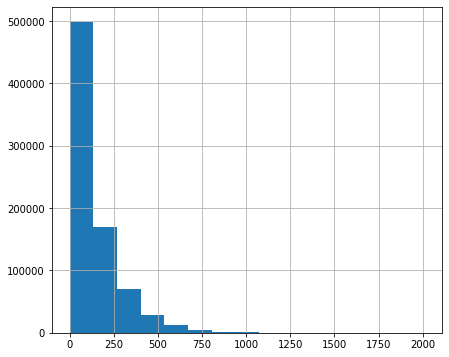

In [36]:
fig = plt.figure(figsize = (7,6))
ax = fig.gca()
hist=data["transactionAmount"].hist(bins=15, ax=ax)

Observation-We can see here than the data is right skewed. This means that most of the transactions were of lower dollar value.

Hypothesis-Customers make credit card transactions of relatively low amounts and rarely use credit cards for high value transaction. A possible reason forthis might be the credit limit for most users.

In [37]:
users_credit_limit=data[['customerId','creditLimit']]

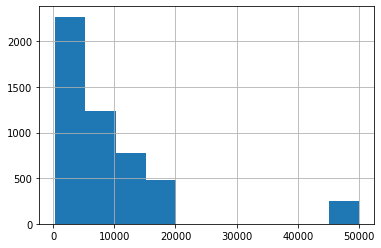

In [39]:
users_credit_limit.drop_duplicates()['creditLimit'].hist()

# Duplicate Transactions

Finding Reversed Transactions

Assuming that a reversed transaction is one that is performed with the same customer by the same merchant and for the same amount and the reversal occurs after the initial payment. Also assuming the reversal-transaction occurs on the same day.

A reversed transaction will occur only after the current transaction. Assuming, a reversed transaction is one that has same-transactionAmount, MerchantId, AccountNumber and checking that available money also increases after the transaction.

In [40]:
sorted_data=data.sort_values(['customerId','transactionDateTime'])

In [42]:
# sorted_data

In [43]:
sorted_data=sorted_data.reset_index(drop=True)
sorted_data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,,0.00,,,,True,,,False,False
1,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,,205.13,,,,True,,,False,False
2,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,,251.56,,,,False,,,False,False
3,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,,0.00,,,,True,,,False,False
4,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,,66.07,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,...,,78.68,,,,True,,,False,False
786359,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,,346.30,,,,False,,,False,False
786360,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,,325.92,,,,False,,,False,False
786361,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,,305.54,,,,False,,,False,False


In [44]:
# reversed_transactions
# creating a key to identify all 3 fields
x=sorted_data.copy()
x.dtypes
x['transaction_date']=x["transactionDateTime"].astype(str)
x['transaction_date']=x['transaction_date'].str[:10]
x['cust_merch_trans']=x['customerId']+"-"+x['merchantName']+"-"+x['transactionAmount'].astype(str)+"-"+x["transaction_date"]

In [45]:
#Initialising the column storing the money after the transaction with max of available money+1

In [46]:
x['nextavailable']=max(x['availableMoney'])+1

In [47]:
x.iat[0,31]

50001.0

In [ ]:
for i in range(len(x)-1):
  current_available=x.iat[i,3]
  next_available=x.iat[i+1,3]
  current_customer=x.iat[i,0]
  next_customer=x.iat[i+1,0]
  if current_customer==next_customer:
    x.iat[i,31]=next_available
  

In [49]:
x

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans,nextavailable
0,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,,,True,,,False,False,2016-01-12,100088067-EZ Putt Putt #982199-205.13-2016-01-12,49794.87
1,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,,,True,,,False,False,2016-01-12,100088067-Dinosaur Sandwitch Bar #303701-46.43...,49748.44
2,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,,,False,,,False,False,2016-01-17,100088067-Mobile eCards-378.67-2016-01-17,50000.00
3,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,,,True,,,False,False,2016-02-02,100088067-EZ Putt Putt #40513-66.07-2016-02-02,49933.93
4,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,,,True,,,False,False,2016-02-03,100088067-34th BBQ #412895-141.6-2016-02-03,49792.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,...,,,True,,,False,False,2016-09-16,999389635-Franks Pub #680641-267.62-2016-09-16,4653.70
786359,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,,,False,,,False,False,2016-09-22,999389635-Play Store-4.62-2016-09-22,4674.08
786360,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,,,False,,,False,False,2016-10-23,999389635-Play Store-4.62-2016-10-23,4694.46
786361,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,,,False,,,False,False,2016-11-24,999389635-Play Store-4.62-2016-11-24,4714.84


In [50]:
x['cust_merch_trans'].value_counts()

225678947-Ray's Fries #745083-0.0-2016-08-03                4
380680241-Fresh Flowers-0.0-2016-04-07                      4
126809470-apple.com-17.73-2016-07-26                        4
892324798-Popeyes #989553-88.43-2016-04-25                  4
151580474-AMC #74121-100.25-2016-05-26                      4
                                                           ..
380680241-Fresh Flowers-79.18-2016-07-10                    1
380680241-Blue Mountain Online Services-88.44-2016-07-10    1
380680241-Next Day Online Services-64.95-2016-07-10         1
380680241-Blue Mountain eCards-173.58-2016-07-10            1
999389635-Play Store-4.62-2016-12-24                        1
Name: cust_merch_trans, Length: 772809, dtype: int64

In [34]:
#x[(x['customerId']=='892324798')& (x['merchantName']=="Popeyes #989553")]
x.iloc[705988:705993]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans
705988,892324798,892324798,5000,2458.97,2016-04-25 16:18:33,88.43,Popeyes #989553,US,US,02,...,,,,True,,,False,False,2016-04-25,892324798-Popeyes #989553-88.43-2016-04-25
705989,892324798,892324798,5000,2370.54,2016-04-25 16:21:17,88.43,Popeyes #989553,US,US,02,...,,,,True,,,False,False,2016-04-25,892324798-Popeyes #989553-88.43-2016-04-25
705990,892324798,892324798,5000,2282.11,2016-04-25 16:21:26,88.43,Popeyes #989553,US,US,02,...,,,,True,,,False,False,2016-04-25,892324798-Popeyes #989553-88.43-2016-04-25
705991,892324798,892324798,5000,2370.54,2016-04-25 16:23:12,88.43,Popeyes #989553,US,US,02,...,,,,True,,,False,False,2016-04-25,892324798-Popeyes #989553-88.43-2016-04-25
705992,892324798,892324798,5000,2282.11,2016-04-26 10:44:09,169.48,Popeyes #67379,US,US,09,...,,,,False,,,False,False,2016-04-26,892324798-Popeyes #67379-169.48-2016-04-26


In [51]:
y=pd.DataFrame(x.groupby('cust_merch_trans').size().reset_index(name="count"))
y['count'].unique()

array([1, 2, 3, 4])

Joining original table and the transaction counts table.

In [52]:
transactions_with_count=pd.merge(x,y,on=['cust_merch_trans','cust_merch_trans'])

In [53]:
transactions_with_count

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans,nextavailable,count
0,100088067,100088067,50000,50000.00,2016-01-12 00:59:52,205.13,EZ Putt Putt #982199,US,US,02,...,,True,,,False,False,2016-01-12,100088067-EZ Putt Putt #982199-205.13-2016-01-12,49794.87,1
1,100088067,100088067,50000,49794.87,2016-01-12 19:49:41,46.43,Dinosaur Sandwitch Bar #303701,US,US,05,...,,True,,,False,False,2016-01-12,100088067-Dinosaur Sandwitch Bar #303701-46.43...,49748.44,1
2,100088067,100088067,50000,49748.44,2016-01-17 15:41:46,378.67,Mobile eCards,US,US,05,...,,False,,,False,False,2016-01-17,100088067-Mobile eCards-378.67-2016-01-17,50000.00,1
3,100088067,100088067,50000,50000.00,2016-02-02 19:57:18,66.07,EZ Putt Putt #40513,US,US,02,...,,True,,,False,False,2016-02-02,100088067-EZ Putt Putt #40513-66.07-2016-02-02,49933.93,1
4,100088067,100088067,50000,49933.93,2016-02-03 04:48:54,141.60,34th BBQ #412895,US,US,09,...,,True,,,False,False,2016-02-03,100088067-34th BBQ #412895-141.6-2016-02-03,49792.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,999389635,999389635,5000,4921.32,2016-09-16 15:35:24,267.62,Franks Pub #680641,US,US,09,...,,True,,,False,False,2016-09-16,999389635-Franks Pub #680641-267.62-2016-09-16,4653.70,1
786359,999389635,999389635,5000,4653.70,2016-09-22 13:58:30,4.62,Play Store,US,US,05,...,,False,,,False,False,2016-09-22,999389635-Play Store-4.62-2016-09-22,4674.08,1
786360,999389635,999389635,5000,4674.08,2016-10-23 16:47:41,4.62,Play Store,US,US,05,...,,False,,,False,False,2016-10-23,999389635-Play Store-4.62-2016-10-23,4694.46,1
786361,999389635,999389635,5000,4694.46,2016-11-24 00:21:46,4.62,Play Store,US,US,05,...,,False,,,False,False,2016-11-24,999389635-Play Store-4.62-2016-11-24,4714.84,1


A Multi-Swipe Transaction is one that occurs multiple times in the same day between the same merchant and customer and of the same amount.

In [54]:
duplicate_transactions=transactions_with_count[transactions_with_count['count']>1]

A reversed transaction is one that is repeated times and the new available balance will increase for the customer. The interesting thing is that these will always be a subset of the multiswipe transactions 

In [55]:
duplicate_transactions['count'].value_counts()

2    23956
3     2319
4       40
Name: count, dtype: int64

In [56]:
#Only appending the transaction where the available balance increases to get reversed transactions.

In [57]:
reversed_transactions=pd.DataFrame()

In [ ]:
for index, row in duplicate_transactions.iterrows():
  if row['availableMoney']<row['nextavailable']:
    reversed_transactions=reversed_transactions.append(row)
reversed_transactions

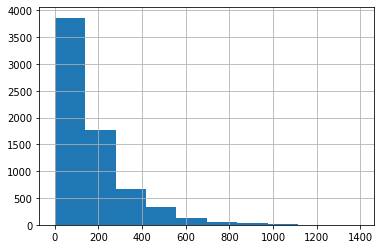

In [64]:
reversed_transactions['transactionAmount'].hist()

In [66]:
#This is right skewed data hence the better estimate of the dollar amount would be the median of the data

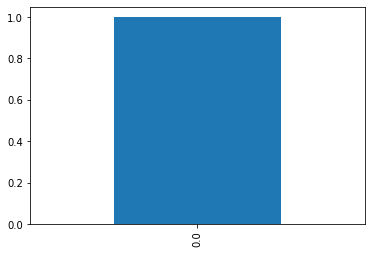

In [77]:
reversed_transaction['isFraud'].value_counts().plot(kind='bar')

In [78]:
#We can see none of the reversed transactions were fraud

In [73]:
dollar_median=reversed_transactions['transactionAmount'].median()

print('Estimated Dollar Amount in reversed transactions',dollar_median)

Estimated Dollar Amount in reversed transactions 117.61


The dataframe 'reversed_transactions' contains the original and reversed transaction.

In [63]:
print("Total reversed transactions are-",reversed_transactions.shape[0])

Total reversed transactions are- 6831


There are a total of 6831 reversed transactions with estimated dollar amount $117.61

In [79]:
reversed_transactions.head(5)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans,nextavailable,count
64,100088067,100088067,50000.0,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,,1.0,,,0.0,0.0,2016-11-20,100088067-AMC #79863-22.32-2016-11-20,49834.20,2.0
97,100328049,100328049,5000.0,4605.10,2016-01-15 20:36:18,43.74,Lyft,US,US,09,...,,False,,,False,False,2016-01-15,100328049-Lyft-43.74-2016-01-15,4648.84,2.0
234,100737756,100737756,250.0,-535.03,2016-01-18 01:58:26,693.50,Franks Deli,US,US,05,...,,True,,,False,False,2016-01-18,100737756-Franks Deli-693.5-2016-01-18,-316.54,3.0
318,100737756,100737756,250.0,202.10,2016-07-02 12:05:04,211.22,South Steakhouse #73819,US,US,09,...,,True,,,False,False,2016-07-02,100737756-South Steakhouse #73819-211.22-2016-...,250.00,2.0
448,101132326,101132326,1000.0,100.93,2016-08-24 02:09:08,188.86,Regal Cinemas #05791,US,US,05,...,,True,,,False,False,2016-08-24,101132326-Regal Cinemas #05791-188.86-2016-08-24,794.71,2.0


In [80]:
#removing the reversed transactions from the multiswipe transactions

In [82]:
multiswipe_transactions

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans,nextavailable,count
55,100088067,100088067,50000,49686.44,2016-10-16 18:01:00,411.35,Fresh Flowers,US,US,02,...,,False,,,False,False,2016-10-16,100088067-Fresh Flowers-411.35-2016-10-16,49275.09,2
56,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,...,,False,,,False,False,2016-10-16,100088067-Fresh Flowers-411.35-2016-10-16,48863.74,2
63,100088067,100088067,50000,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,...,,True,,,False,False,2016-11-20,100088067-AMC #79863-22.32-2016-11-20,49811.88,2
64,100088067,100088067,50000,49811.88,2016-11-20 08:00:04,22.32,AMC #79863,US,US,09,...,,True,,,False,False,2016-11-20,100088067-AMC #79863-22.32-2016-11-20,49834.20,2
96,100328049,100328049,5000,4648.84,2016-01-15 20:34:35,43.74,Lyft,US,US,09,...,,False,,,False,False,2016-01-15,100328049-Lyft-43.74-2016-01-15,4605.10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786138,999258704,999258704,5000,4246.82,2016-03-16 07:14:17,367.13,Uber,US,US,09,...,,False,,,False,False,2016-03-16,999258704-Uber-367.13-2016-03-16,4613.95,2
786182,999258704,999258704,5000,4938.10,2016-09-02 03:31:57,72.93,gap.com,US,US,09,...,,False,,,False,False,2016-09-02,999258704-gap.com-72.93-2016-09-02,4865.17,2
786183,999258704,999258704,5000,4865.17,2016-09-02 03:33:07,72.93,gap.com,US,US,09,...,,False,,,False,False,2016-09-02,999258704-gap.com-72.93-2016-09-02,4938.10,2
786256,999283629,999283629,2500,1616.30,2016-04-09 12:56:43,247.40,Delta Airlines,US,US,05,...,,False,,,False,False,2016-04-09,999283629-Delta Airlines-247.4-2016-04-09,1368.90,2


In [81]:
multi_swipe=multiswipe_transactions[multiswipe_transactions.index.isin(reversed_transactions.index) == False]
multi_swipe


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,transaction_date,cust_merch_trans,nextavailable,count
55,100088067,100088067,50000,49686.44,2016-10-16 18:01:00,411.35,Fresh Flowers,US,US,02,...,,False,,,False,False,2016-10-16,100088067-Fresh Flowers-411.35-2016-10-16,49275.09,2
56,100088067,100088067,50000,49275.09,2016-10-16 18:01:02,411.35,Fresh Flowers,US,US,02,...,,False,,,False,False,2016-10-16,100088067-Fresh Flowers-411.35-2016-10-16,48863.74,2
63,100088067,100088067,50000,49834.20,2016-11-20 07:57:05,22.32,AMC #79863,US,US,09,...,,True,,,False,False,2016-11-20,100088067-AMC #79863-22.32-2016-11-20,49811.88,2
96,100328049,100328049,5000,4648.84,2016-01-15 20:34:35,43.74,Lyft,US,US,09,...,,False,,,False,False,2016-01-15,100328049-Lyft-43.74-2016-01-15,4605.10,2
232,100737756,100737756,250,55.59,2016-01-18 01:55:24,693.50,Franks Deli,US,US,05,...,,True,,,False,False,2016-01-18,100737756-Franks Deli-693.5-2016-01-18,-44.75,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786067,999257059,999257059,15000,14879.31,2016-08-09 11:25:29,557.11,Washington Times,US,US,05,...,,False,,,False,False,2016-08-09,999257059-Washington Times-557.11-2016-08-09,14322.20,2
786137,999258704,999258704,5000,4613.95,2016-03-16 07:13:48,367.13,Uber,US,US,09,...,,False,,,False,False,2016-03-16,999258704-Uber-367.13-2016-03-16,4246.82,2
786182,999258704,999258704,5000,4938.10,2016-09-02 03:31:57,72.93,gap.com,US,US,09,...,,False,,,False,False,2016-09-02,999258704-gap.com-72.93-2016-09-02,4865.17,2
786256,999283629,999283629,2500,1616.30,2016-04-09 12:56:43,247.40,Delta Airlines,US,US,05,...,,False,,,False,False,2016-04-09,999283629-Delta Airlines-247.4-2016-04-09,1368.90,2


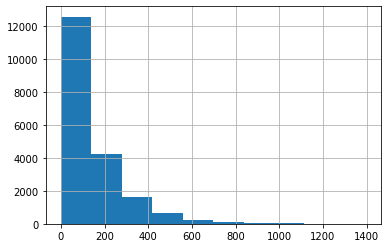

In [83]:
multi_swipe['transactionAmount'].hist()

In [84]:
#This is left skewed, hence the median will be a good estimate of the dollar value of a transaction

In [85]:
dollar_median=multi_swipe['transactionAmount'].median()

print('Estimated Dollar Amount in reversed transactions',dollar_median)

Estimated Dollar Amount in reversed transactions 89.505


In [86]:
print("Total Multiswipe transactions=",multi_swipe.shape[0])

Total Multiswipe transactions= 19484


# Question 4: Fraud Detection Modelling

In [122]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,,0.0,,,,True,,,False,False


->Dropping Columns with only blank values. 

->Dropping cutomerId and Account number as they have a large number of values. However, some accounts might be more prone to fraud.

->Dropping Entered CVV and creating a column of whether the entered CVV was indeed the correct one.

-> Rather than the transaction timestamp, just the time is more relevant.

-> Dropping cardlast4digits as it is always safe to share them

-> dropping current expiry and Account open date

-> We can drop merchantName and only keep the category of the merchant. This helps to reduce features and avoid overfitting.

In [123]:
dataframe=data.copy()

In [124]:
dataframe['transactionDateTime']=dataframe['transactionDateTime'].astype(str)
dataframe['transactionTime']=dataframe['transactionDateTime'].str[11:]

In [125]:
dataframe['transactionTime'].unique()

array(['14:27:32', '05:05:54', '09:18:39', ..., '05:11:47', '18:25:33',
       '20:41:13'], dtype=object)

In [126]:
dataframe['transactionTime']=dataframe['transactionTime'].astype('datetime64').astype(int).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [127]:
dataframe['currentExpDate']=dataframe['currentExpDate'].astype('datetime64[ns]').astype(int).astype(float)
dataframe['accountOpenDate']=dataframe['accountOpenDate'].astype('datetime64[ns]').astype(int).astype(float)
dataframe['dateOfLastAddressChange']=dataframe['dateOfLastAddressChange'].astype('datetime64[ns]').astype(int).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [128]:
#New Column CVV check as a fraud may enter a wrong cvv
condition = dataframe.eval("cardCVV==enteredCVV")
dataframe['cvvCheck']=np.where(condition,1,0)

In [129]:
#For mechantCountryCode
merchant_mapping=dataframe[['merchantName','merchantCountryCode']]

In [130]:
merchant_mapping=merchant_mapping.drop_duplicates()
merchant_count=pd.DataFrame(merchant_mapping.groupby('merchantName').size().reset_index(name="count"))

In [131]:
merchant_count

,merchantName,count
0,1st BBQ,4
1,1st Deli,5
2,1st Pub,4
3,1st Restaurant,4
4,1st Sandwitch Bar #119707,4
...,...,...
2485,staples.com,5
2486,target.com,5
2487,walmart.com,5
2488,westelm.com,3


This shows that the particular merchantName exists in multiple locations. Hence, we cannot create a 1 to 1 mapping of merchantName and country. Thus, dropping records where merchantCountry is blank. Alternatively, we could find mode of each merchantCountry for a merchantName and replace the blanks with that value and drop those records which still remain blank.

In [132]:
dataframe=dataframe.drop(['accountNumber','customerId','echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','cardLast4Digits','transactionDateTime','merchantName','cardCVV','enteredCVV'],axis=1)

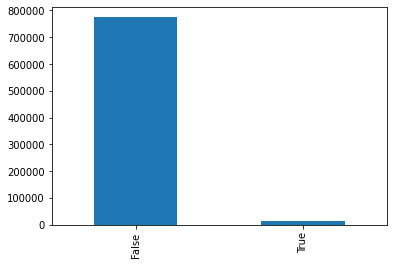

In [133]:
dataframe['isFraud'].value_counts().plot(kind='bar')

In [134]:
#This is a anomaly detection roblem since the dataset is highly skewed.
#I will replace the missing values with the mean/meadian/mode of that column. Another method is to develop classifiers to predict the value of that column based on other values.


In [135]:
dataframe=dataframe[dataframe.merchantCountryCode!='']
dataframe['merchantCountryCode'].unique()

array(['US', 'CAN', 'PR', 'MEX'], dtype=object)

In [136]:
def replace_with_mode(dataframe,columnname):
  mode_df=pd.DataFrame(dataframe[columnname].mode())
  print(mode_df)
  mode_value=mode_df.iat[0,0]
  dataframe[columnname]=dataframe[columnname].replace('',mode_value)

In [137]:
replace_missing=['acqCountry','posEntryMode','posConditionCode','transactionType']

In [138]:
for col in replace_missing:
  replace_with_mode(dataframe,col)
  print(dataframe[col].unique())

    0
0  US
['US' 'CAN' 'MEX' 'PR']
    0
0  05
['02' '09' '05' '80' '90']
    0
0  01
['01' '08' '99']
          0
0  PURCHASE
['PURCHASE' 'ADDRESS_VERIFICATION' 'REVERSAL']


In [139]:
dataframe['isFraud'].value_counts()

False    773304
True      12335
Name: isFraud, dtype: int64

In [140]:
dataframe['isFraud']=np.where(dataframe['isFraud']==True,1,0)
dataframe['isFraud'].value_counts()

0    773304
1     12335
Name: isFraud, dtype: int64

In [141]:
dataframe['cardPresent']=np.where(dataframe['cardPresent']==True,1,0)
dataframe['cardPresent'].value_counts()

0    433087
1    352552
Name: cardPresent, dtype: int64

In [142]:
dataframe['expirationDateKeyInMatch']=np.where(dataframe['expirationDateKeyInMatch']==True,1,0)
dataframe['expirationDateKeyInMatch'].value_counts()

0    784599
1      1040
Name: expirationDateKeyInMatch, dtype: int64

In [143]:
#checking for correlation between columns

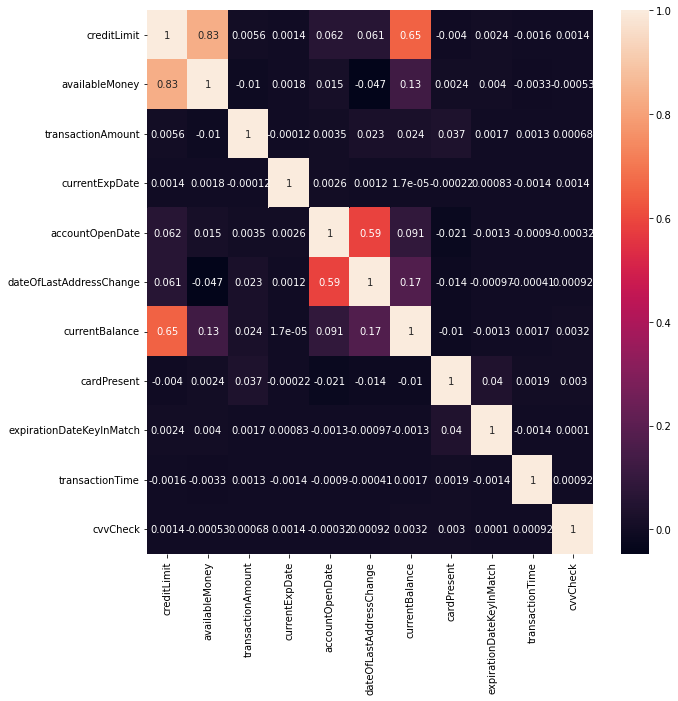

In [144]:
X=dataframe.drop(['isFraud'],axis=1)
y=dataframe['isFraud']
plt.figure(figsize=(10,10))
corr_matrix=X.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

The only two features that have slightly high correlation are currentBalance and creditLimit and availableMoney and CreditLimit. However, This correlation is not very high, hence we will retain these features.

In [145]:
X

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,transactionTime,cvvCheck
0,5000,5000.00,98.55,US,US,02,01,rideshare,1.685578e+18,1.426291e+18,1.426291e+18,PURCHASE,0.00,0,0,1.665066e+18,1
1,5000,5000.00,74.51,US,US,09,01,entertainment,1.706746e+18,1.426291e+18,1.426291e+18,PURCHASE,0.00,1,0,1.665033e+18,1
2,5000,5000.00,7.47,US,US,09,01,mobileapps,1.754006e+18,1.426291e+18,1.426291e+18,PURCHASE,0.00,0,0,1.665048e+18,1
3,5000,5000.00,7.47,US,US,09,01,mobileapps,1.754006e+18,1.426291e+18,1.426291e+18,PURCHASE,0.00,0,0,1.665022e+18,1
4,5000,5000.00,71.18,US,US,02,01,fastfood,1.885507e+18,1.438819e+18,1.438819e+18,PURCHASE,0.00,1,0,1.665090e+18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,US,US,90,01,rideshare,1.669853e+18,1.345680e+18,1.345680e+18,PURCHASE,1095.04,0,0,1.665082e+18,1
786359,50000,48785.04,18.89,US,US,09,01,online_subscriptions,1.690848e+18,1.345680e+18,1.345680e+18,PURCHASE,1214.96,0,0,1.665073e+18,1
786360,50000,48766.15,49.43,US,US,02,01,rideshare,1.754006e+18,1.345680e+18,1.345680e+18,PURCHASE,1233.85,0,0,1.665071e+18,1
786361,50000,48716.72,49.89,US,US,09,99,online_retail,1.656634e+18,1.345680e+18,1.345680e+18,PURCHASE,1283.28,0,0,1.665016e+18,1


In [146]:
ohe_columns=['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','merchantCategoryCode','transactionType','cardPresent','expirationDateKeyInMatch']

In [147]:
X=pd.get_dummies(dataframe,columns=ohe_columns, prefix=ohe_columns,drop_first=True)

In [148]:
X

,creditLimit,availableMoney,transactionAmount,currentExpDate,accountOpenDate,dateOfLastAddressChange,currentBalance,isFraud,transactionTime,cvvCheck,...,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,transactionType_PURCHASE,transactionType_REVERSAL,cardPresent_1,expirationDateKeyInMatch_1
0,5000,5000.00,98.55,1.685578e+18,1.426291e+18,1.426291e+18,0.00,0,1.665066e+18,1,...,0,0,0,0,1,0,1,0,0,0
1,5000,5000.00,74.51,1.706746e+18,1.426291e+18,1.426291e+18,0.00,0,1.665033e+18,1,...,0,0,0,0,0,0,1,0,1,0
2,5000,5000.00,7.47,1.754006e+18,1.426291e+18,1.426291e+18,0.00,0,1.665048e+18,1,...,0,0,0,0,0,0,1,0,0,0
3,5000,5000.00,7.47,1.754006e+18,1.426291e+18,1.426291e+18,0.00,0,1.665022e+18,1,...,0,0,0,0,0,0,1,0,0,0
4,5000,5000.00,71.18,1.885507e+18,1.438819e+18,1.438819e+18,0.00,0,1.665090e+18,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,50000,48904.96,119.92,1.669853e+18,1.345680e+18,1.345680e+18,1095.04,0,1.665082e+18,1,...,0,0,0,0,1,0,1,0,0,0
786359,50000,48785.04,18.89,1.690848e+18,1.345680e+18,1.345680e+18,1214.96,0,1.665073e+18,1,...,0,0,1,0,0,0,1,0,0,0
786360,50000,48766.15,49.43,1.754006e+18,1.345680e+18,1.345680e+18,1233.85,0,1.665071e+18,1,...,0,0,0,0,1,0,1,0,0,0
786361,50000,48716.72,49.89,1.656634e+18,1.345680e+18,1.345680e+18,1283.28,0,1.665016e+18,1,...,0,1,0,0,0,0,1,0,0,0


In [149]:
from sklearn.model_selection import train_test_split

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=1)

First, Fitting a basic Logistic regression Model


In [151]:
X.columns

Index(['creditLimit', 'availableMoney', 'transactionAmount', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'currentBalance',
       'isFraud', 'transactionTime', 'cvvCheck', 'acqCountry_MEX',
       'acqCountry_PR', 'acqCountry_US', 'merchantCountryCode_MEX',
       'merchantCountryCode_PR', 'merchantCountryCode_US', 'posEntryMode_05',
       'posEntryMode_09', 'posEntryMode_80', 'posEntryMode_90',
       'posConditionCode_08', 'posConditionCode_99',
       'merchantCategoryCode_auto', 'merchantCategoryCode_cable/phone',
       'merchantCategoryCode_entertainment', 'merchantCategoryCode_fastfood',
       'merchantCategoryCode_food', 'merchantCategoryCode_food_delivery',
       'merchantCategoryCode_fuel', 'merchantCategoryCode_furniture',
       'merchantCategoryCode_gym', 'merchantCategoryCode_health',
       'merchantCategoryCode_hotels', 'merchantCategoryCode_mobileapps',
       'merchantCategoryCode_online_gifts',
       'merchantCategoryCode_online_retail'

In [160]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=50000)
lr.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=50000)

In [161]:
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[77290     0]
 [ 1274     0]]


Clearly, a simple logistic regression model is incapable of modelling our data. Hence, using advance models.

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
rfc = RandomForestClassifier(n_estimators = 100) 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [157]:
y_pred=rfc.predict(X_test)
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

[[77290     0]
 [    0  1274]]


In [158]:
#This is the best result we could get

Metrics to judge our classifier are:
1) Precision-Out of all that we detected Fraud, which were actually fraud
2) Recall-Fraction of actual frauds we detected correctly

In [159]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='macro')

(1.0, 1.0, 1.0, None)